# Test for DS/AI class

========================================================
### 1. Server spec!

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14156986416039853378
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6853442322268935665
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

========================================================
### 2. OS 확인하기!

In [2]:
import platform
platform.platform()

'Linux-5.10.133+-x86_64-with-glibc2.27'

========================================================
### 3. Say Hello!

In [3]:
# write hello world!
print('hello world!!!')

hello world!!!


========================================================
### 4. NumPy의 array
행렬, 벡터 표현

In [4]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
print("x=\n{}".format(x))

y = np.array([[1,2,3], [4,5,6]])
print("y=\n{}".format(y))


x=
[[1 2 3]
 [4 5 6]]
y=
[[1 2 3]
 [4 5 6]]


========================================================
### 5. matplotlib 그래프 그리기

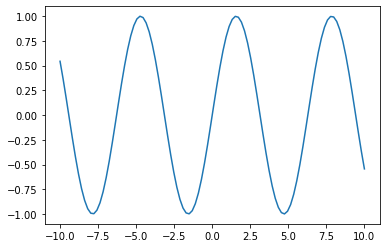

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

y = np.sin(x)

plt.plot(x, y)

========================================================
### 6. pandas 테이블 데이터 처리

In [6]:
import pandas as pd
data = {"Name" : ['Kim', 'Lee', 'Park'],
          "Location" : ['Seoul', 'Busan', 'Deagu'],
           "Age" : [24, 13, 50,]}
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,Kim,Seoul,24
1,Lee,Busan,13
2,Park,Deagu,50


========================================================
### 7. MNIST 숫자 손글씨 인식
인공신경망으로! 

In [18]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files

mnist_train = files.upload()
mnist_test = files.upload()

Saving mnist_train.csv to mnist_train.csv


Saving mnist_test.csv to mnist_test.csv


7.1 데이터 업로드 후 데이터 확인

In [19]:
from subprocess import check_output
print(check_output(["ls", "../content/."]).decode("utf8"))

drive
mnist_test.csv
mnist_train.csv
sample_data



7.2 pandas 활용 데이터 구조 관찰하기

head() 메서드 활용! 

In [21]:
import csv as csv
import pandas as pd

train_df = pd.read_csv("mnist_train.csv",header=0)    # find the directory where the data exists.
train_df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7.3 인공신경망으로 학습 후 학습된 모델 저장하기!

(59999, 785)
(59999,)
(59999, 784)
Image of a MNIST handwrite digit
sgd
0.9204166666666667
Saved "neural_output" to file.


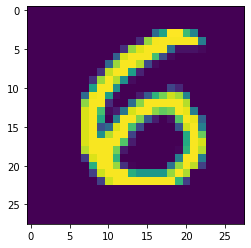

In [22]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

################################################################################
# 1. Data load and organization
train_df = pd.read_csv("mnist_train.csv",header=0)     # find the directory where the data exists.
print(train_df.shape)

train_data = train_df.values
# data size 확인하기
print(train_data[0::,0].shape)
print(train_data[0::,1::].shape)

X_train, X_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], test_size=0.2, random_state=0)

# show an image
print("Image of a MNIST handwrite digit")
plt.imshow(np.reshape(X_train[8,::],(28,28)))


################################################################################
# 2. MLP learning
clf = MLPClassifier(solver='sgd')  # clf  : (설명보기: 스페이스바) MLPClassifier 클래스의 객체
clf.fit(X_train, y_train)   # train!
neural_output = clf.predict(X_test) # 테스트 데이터의 input data를 입력해주면 output label을 예측한다 
print("sgd")
print(accuracy_score(y_test, neural_output)) # 데스트 데이터의 output label과 비교해서 정확도를 산출해준다


################################################################################
# 3. save the model to disk 
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))  # pickle 패키지를 사용


################################################################################
# 4. save the predicted output label 
output = neural_output
predictions_file = open("neural_output.csv", "w")
open_file_object = csv.writer(predictions_file)
ids = range(neural_output.__len__())
ids = [x+1 for x in ids]
open_file_object.writerow(["ImageId", "Label"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print('Saved "neural_output" to file.')





7.4 저장한 모델 다시 불러와서 적용하기!

In [23]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

train_df = pd.read_csv("mnist_train.csv",header=0)   # find the directory where the data exists.
train_data = train_df.values

X_train, X_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], test_size=0.2, random_state=0)


################################################################################
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
# predict by saved model
neural_output = loaded_model.predict(X_test)
print("sgd_from_saved_model")
print(accuracy_score(y_test, neural_output))



sgd_from_saved_model
0.9204166666666667


7.5 MNIST로 학습한 모델 불러와서 자신의 숫자 손글씨 쓰기에 적용하기!

Saving my_number.jpg to my_number.jpg
Infer handwrite digit
Prediction: [3]


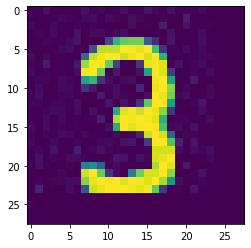

In [24]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image
import matplotlib.pyplot as plt

my_number = files.upload()

################################################################################
# 1. my handwriting image loading
im = plt.imread('my_number.jpg')    # find the directory where the data exists.
im = im[:,:,1] 
#im = im.astype('float32') / 255.
im = im.astype('float32')


im = np.array(im)
im = - im + 1
plt.imshow(im)  # show the image

################################################################################
# 2. load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
# print(np.reshape(im, (-1, 28*28)).size)
neural_output = loaded_model.predict(np.reshape(im, (-1,28*28)))
print("Infer handwrite digit")
print("Prediction:", neural_output)


========================================================
### 8. 과제


In [ ]:
################################################################################
# Assignment

import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image
import matplotlib.pyplot as plt


train_df = pd.read_csv("../content/train.csv",header=0)    # find the directory where the data exists.
train_data = train_df.values
X_train, X_test, y_train, y_test = train_test_split(train_data[0::,1::], train_data[0::,0], test_size=0.2, random_state=0)

################################################################################
# 1. 자신의 Name / Faculty / Student Number pandas로 출력하기
# Name / Faculty / Student Number


################################################################################
# 2. size of train data (X_train 와 y_train) 출력하기


################################################################################
# 3. size of test data (X_test 와 y_test) 출력하기


################################################################################
# 4. 학습된 모델 불러와서 X_test, y_test 중에서 10개의 데이터에 대해서 모델값을 예측하고 정확도 출력하기 

# load the model from disk

# predict by saved model

